In [296]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [297]:
import numpy as np
import pandas as pd

In [298]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [299]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from flask import Flask, jsonify

In [300]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [301]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [302]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [303]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [304]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [305]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>='2016-08-23').all()
precipdf=pd.DataFrame(precip)
precipdf.set_index(precipdf["date"],inplace=True)
precipdf

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
2016-08-28,2016-08-28,0.01
2016-08-29,2016-08-29,0.00
2016-08-30,2016-08-30,0.00
2016-08-31,2016-08-31,0.13


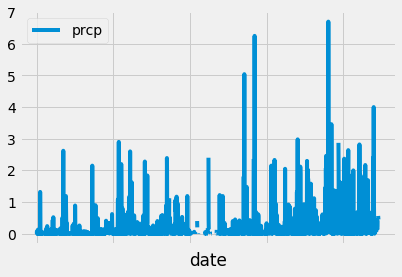

In [306]:
precipdf.plot()

In [307]:
#Design a query to calculate the total number of stations.
data = session.query(Station.station).count()
data

9

In [308]:
# Design a query to show how many stations are available in this dataset?
Stationq = session.query(Station.station).all()
Stationq

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [309]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order.
activestations = session.query(Measurement.station, func.count(Measurement.station))
activstat=activestations.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activstat
                        

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [310]:
inspector = inspect(engine)

In [311]:
#Which station has the highest number of observations?
activstat[0][0]

'USC00519281'

In [312]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
tempobs = session.query(Measurement.date, Measurement.tobs, Measurement.station).filter(Measurement.date>='2016-08-23').all()
tempobsdf=pd.DataFrame(tempobs)
tempobsdf


,date,tobs,station
0,2016-08-23,81.0,USC00519397
1,2016-08-24,79.0,USC00519397
2,2016-08-25,80.0,USC00519397
3,2016-08-26,79.0,USC00519397
4,2016-08-27,77.0,USC00519397
5,2016-08-28,78.0,USC00519397
6,2016-08-29,78.0,USC00519397
7,2016-08-30,79.0,USC00519397
8,2016-08-31,80.0,USC00519397
9,2016-09-01,81.0,USC00519397


In [313]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

In [314]:
#Filter by the station with the highest number of observations.
tempstation = session.query(Measurement.station,func.max(Measurement.tobs)).order_by(Measurement.station).all()
tempstation

[('USC00519397', 87.0)]

In [315]:
#Filter by the station with the highest number of observations.
stationhighest = session.query(Measurement.tobs).filter(Measurement.station=='USC00519397').all()
dfstationhig=pd.DataFrame(stationhighest)
dfstationhig

,tobs
0,65.0
1,63.0
2,74.0
3,76.0
4,73.0
5,70.0
6,64.0
7,68.0
8,73.0
9,64.0


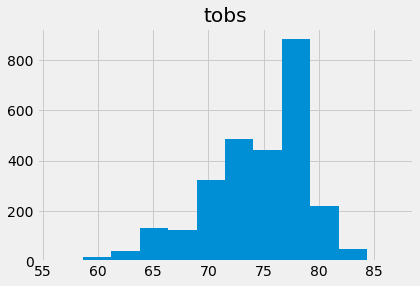

In [316]:
#Plot the results as a histogram with `bins=12`.
hist=dfstationhig.hist(bins=12)

In [317]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipdf.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [318]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-01-11', '2017-01-16'))

[(63.0, 70.1470588235294, 81.0)]


In [319]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
def calc_temps(start_date, end_date):
    """"TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    #"""
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-01-11', '2016-01-16'))
# for your trip using the previous year's data for those same dates.


[(62.0, 68.85714285714286, 77.0)]


In [320]:
start_date = dt.datetime(2016,1,11)
end_date=dt.datetime(2016,1,16)

In [321]:
#tavg=session.query(func.min(Measurement.tobs).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
#tavg
tmin=session.query(func.min(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
tmax=session.query(func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
tavg=session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()



In [322]:
tempvar=(calc_temps('2016-01-11','2016-01-16'))
tempvar

[(62.0, 68.85714285714286, 77.0)]

Text(0.5, 1.0, 'Trip Avg Temp')

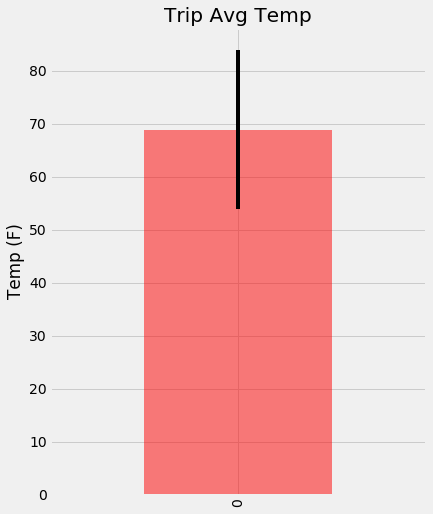

In [323]:
temp_stats=pd.DataFrame(tempvar,columns=['Temp Min', 'Temp Avg', 'Temp Max'])
ptps= temp_stats["Temp Max"]-temp_stats["Temp Min"]
temp_stats["Temp Avg"].plot(kind='bar',yerr=ptps,figsize=(6,8), alpha=0.5, color='red')
plt.ylabel("Temp (F)")
plt.title('Trip Avg Temp')


In [324]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
totrainfall=session.query(Measurement.station,(func.sum(Measurement.prcp))).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
df4=pd.DataFrame(totrainfall, columns=['Station','Precipitation'])
df4

,Station,Precipitation
0,USC00514830,0.52
1,USC00519281,0.09
2,USC00513117,0.06
3,USC00519397,0.01
4,USC00516128,0.00
5,USC00519523,0.00


In [325]:

# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sorttotrainfall=session.query(Measurement.station, func.sum(Measurement.prcp), Station.name, Station.longitude, Station.latitude, Station.elevation).filter(Measurement.station==Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
df5=pd.DataFrame(sorttotrainfall, columns=['Station','Precipitation','Name', 'Longitude','Latitude', 'Elevation'])
df5

,Station,Precipitation,Name,Longitude,Latitude,Elevation
0,USC00514830,0.52,"KUALOA RANCH HEADQUARTERS 886.9, HI US",-157.83740,21.52130,7.0
1,USC00519281,0.09,"WAIHEE 837.5, HI US",-157.84889,21.45167,32.9
2,USC00513117,0.06,"KANEOHE 838.1, HI US",-157.80150,21.42340,14.6
3,USC00519397,0.01,"WAIKIKI 717.2, HI US",-157.81680,21.27160,3.0
4,USC00516128,0.00,"MANOA LYON ARBO 785.2, HI US",-157.80250,21.33310,152.4
5,USC00519523,0.00,"WAIMANALO EXPERIMENTAL FARM, HI US",-157.71139,21.33556,19.5


## Optional Challenge Assignment

In [326]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [327]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [328]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [329]:
# Plot the daily normals as an area plot with `stacked=False`
